In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [26]:
# Scatterplot matrix.
# Default plot aesthetics.
sns.set_style("white")

df = pd.read_csv('FIFA 2018 Statistics.csv')
df.tail()
df.describe()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO,Own goals,Own goal Time
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,94.000000,128.000000,12.0,12.000000
mean,1.320312,49.992188,12.593750,3.914062,5.273438,3.359375,4.718750,1.343750,14.890625,2.726562,...,462.648438,106.664062,13.546875,1.695312,0.015625,0.015625,39.457447,0.203125,1.0,45.833333
std,1.156519,10.444074,5.245827,2.234403,2.409675,2.403195,2.446072,1.193404,4.724262,2.049447,...,151.186311,11.749537,4.619131,1.325454,0.124507,0.124507,24.496506,0.807049,0.0,29.978275
min,0.000000,25.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,...,189.000000,80.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,12.000000
25%,0.000000,42.000000,9.000000,2.000000,4.000000,1.750000,3.000000,0.000000,11.000000,1.000000,...,351.000000,101.000000,10.000000,1.000000,0.000000,0.000000,18.250000,0.000000,1.0,21.750000
50%,1.000000,50.000000,12.000000,3.500000,5.000000,3.000000,5.000000,1.000000,15.000000,2.000000,...,462.000000,104.500000,13.000000,2.000000,0.000000,0.000000,39.000000,0.000000,1.0,35.000000
75%,2.000000,58.000000,15.000000,5.000000,7.000000,4.000000,6.000000,2.000000,18.000000,4.000000,...,555.250000,109.000000,16.000000,2.000000,0.000000,0.000000,54.750000,0.000000,1.0,75.750000
max,6.000000,75.000000,26.000000,12.000000,11.000000,10.000000,11.000000,5.000000,26.000000,9.000000,...,1137.000000,148.000000,25.000000,6.000000,1.000000,1.000000,90.000000,4.000000,1.0,90.000000


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


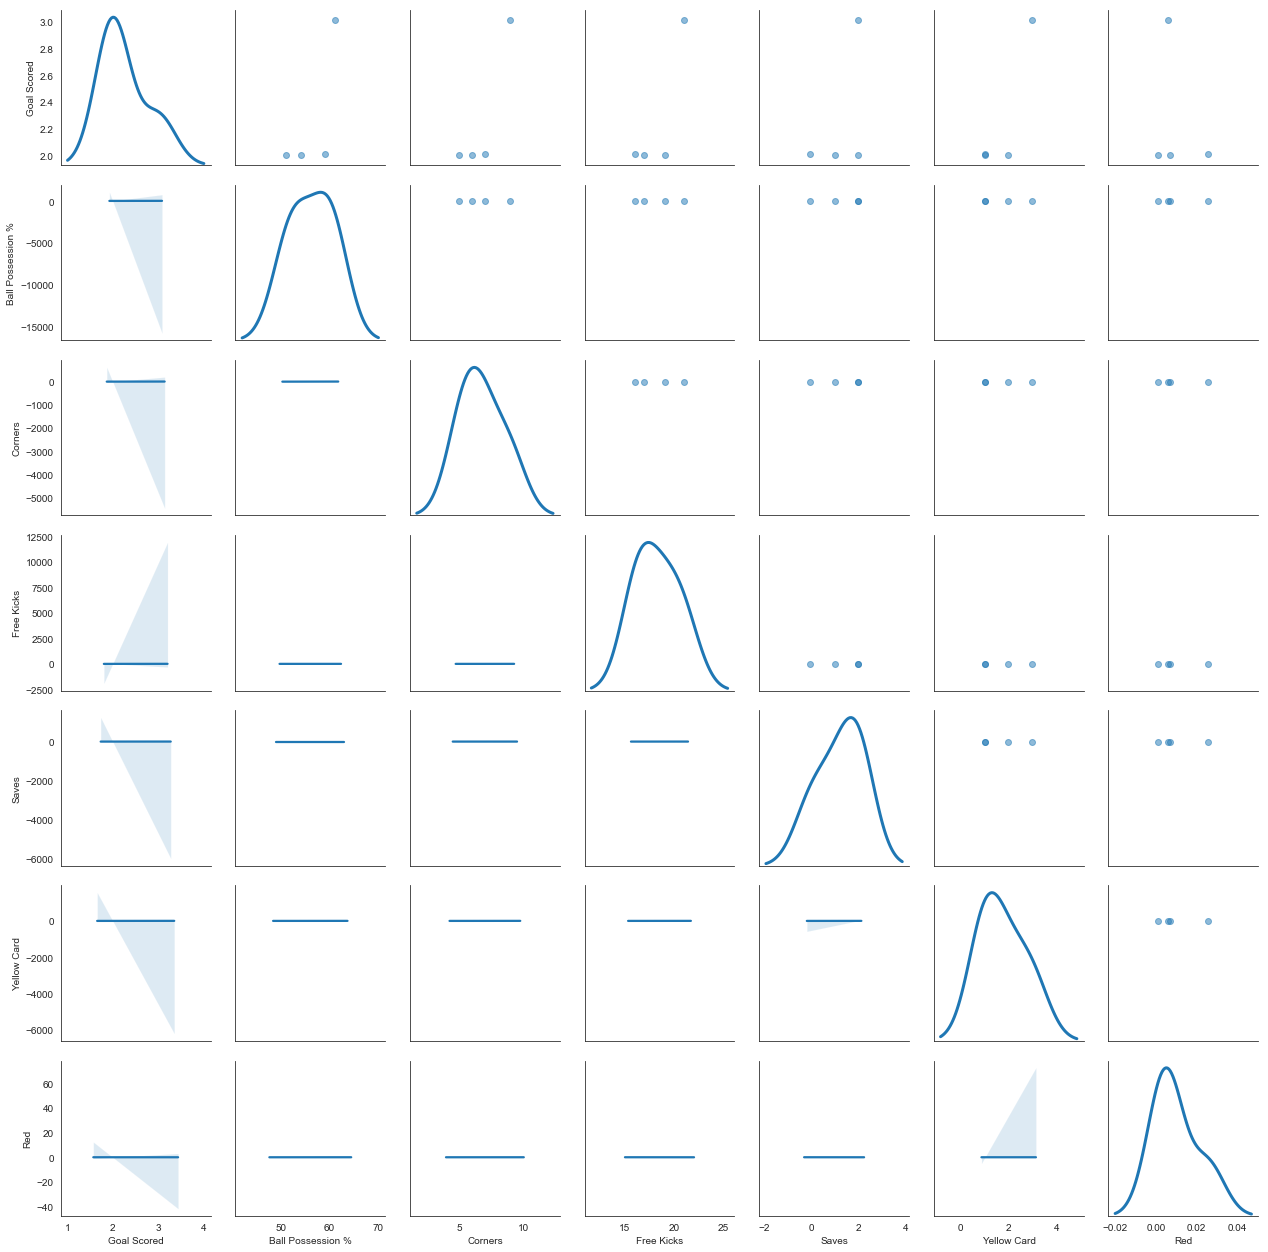

In [3]:
# Subset of data (only looking at the four teams in the semi-final round).
df_main = df.loc[
    ((df['Team'] == 'Belgium') | (df['Team'] == 'France') | (df['Team'] == 'England') | (df['Team'] == 'Croatia')),
    ['Team', 'Goal Scored', 'Ball Possession %', 'Corners', 'Free Kicks',
        'Saves', 'Yellow Card', 'Red']
]

# Make copy of data and add jitter.
df_jittered = df_main.loc[:, 'Goal Scored':'Red'].dropna()
# Making random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.03, .03, size=(df_jittered.shape)),
    columns=df_jittered.columns
)
# Combine the data and noise.
df_jittered = df_jittered.add(jitter)

# Make scatterplot matrix.
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
# Scatterplot
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing linear relationships of two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give info about univariate distributions of variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()


                   Goal Scored  Ball Possession %   Corners  Free Kicks  \
Goal Scored           1.000000          -0.115824 -0.140807    0.026481   
Ball Possession %    -0.115824           1.000000  0.467145   -0.038568   
Corners              -0.140807           0.467145  1.000000    0.201648   
Free Kicks            0.026481          -0.038568  0.201648    1.000000   
Saves                -0.144982          -0.138020  0.047610   -0.011134   
Yellow Card           0.044757          -0.115591 -0.131546    0.289204   
Red                        NaN                NaN       NaN         NaN   

                      Saves  Yellow Card  Red  
Goal Scored       -0.144982     0.044757  NaN  
Ball Possession % -0.138020    -0.115591  NaN  
Corners            0.047610    -0.131546  NaN  
Free Kicks        -0.011134     0.289204  NaN  
Saves              1.000000     0.145410  NaN  
Yellow Card        0.145410     1.000000  NaN  
Red                     NaN          NaN  NaN  


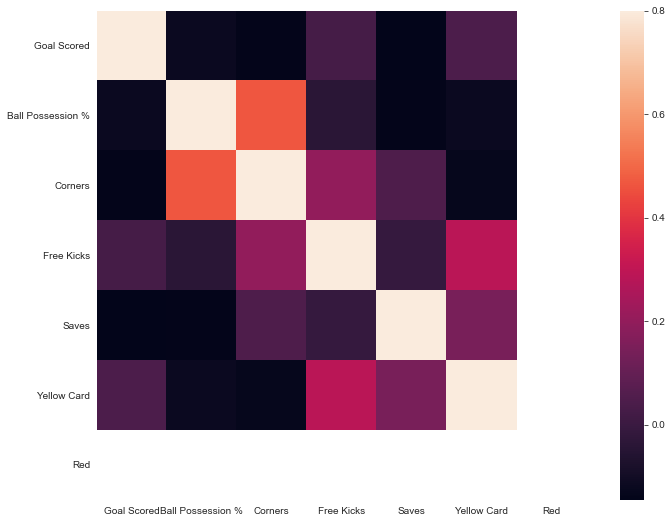

In [4]:
# Make the correlation matrix.
corrmat = df_main.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()


In [5]:
print(df.Team.unique())
    

['Russia' 'Saudi Arabia' 'Egypt' 'Uruguay' 'Morocco' 'Iran' 'Portugal'
 'Spain' 'France' 'Australia' 'Argentina' 'Iceland' 'Peru' 'Denmark'
 'Croatia' 'Nigeria' 'Costa Rica' 'Serbia' 'Germany' 'Mexico' 'Brazil'
 'Switzerland' 'Sweden' 'Korea Republic' 'Belgium' 'Panama' 'Tunisia'
 'England' 'Colombia' 'Japan' 'Poland' 'Senegal']


In [6]:
# Making dummies.
# Also creating a data frame to hold our features.
features = pd.get_dummies(df['Team'])

# Domination dummy.
features['domination'] = np.where((df['Team'].isin(['Ball Possession %', 'Corners'])), 1, 0)

print(pd.crosstab(features['domination'], df['Team']))

Team        Argentina  Australia  Belgium  Brazil  Colombia  Costa Rica  \
domination                                                                
0                   4          3        7       5         4           3   

Team        Croatia  Denmark  Egypt  England   ...     Portugal  Russia  \
domination                                     ...                        
0                 7        4      3        7   ...            4       5   

Team        Saudi Arabia  Senegal  Serbia  Spain  Sweden  Switzerland  \
domination                                                              
0                      3        3       3      4       5            4   

Team        Tunisia  Uruguay  
domination                    
0                 3        5  

[1 rows x 32 columns]


In [16]:
# Create feature 'GreatSaves'.
features['GreatSaves'] = df_main[df_main['Saves']>5]['Saves']
print(df_main['Saves'].groupby(features['GreatSaves']).describe())


            count  mean  std  min  25%  50%  75%  max
GreatSaves                                           
9.0           1.0   9.0  NaN  9.0  9.0  9.0  9.0  9.0


In [21]:
# Create feature 'Control'.
features['Control'] = df_main[df_main['Ball Possession %']>59]['Ball Possession %']
print(df_main['Ball Possession %'].groupby(features['Control']).describe())

         count  mean  std   min   25%   50%   75%   max
Control                                                
60.0       1.0  60.0  NaN  60.0  60.0  60.0  60.0  60.0
61.0       2.0  61.0  0.0  61.0  61.0  61.0  61.0  61.0
62.0       2.0  62.0  0.0  62.0  62.0  62.0  62.0  62.0


In [25]:
# Create feature 'Shutouts'.
features['Shutouts'] = df_main[df_main['Goal Scored'] == 0]['Goal Scored']
print(df_main['Goal Scored'].groupby(features['Shutouts']).describe())

          count  mean  std  min  25%  50%  75%  max
Shutouts                                           
0.0         4.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0


In [27]:
# Create feature 'Aggressive'.
features['Aggressive'] = df[df['Offsides']>3]['Offsides']
print(df['Offsides'].groupby(features['Aggressive']).describe())

            count  mean  std  min  25%  50%  75%  max
Aggressive                                           
4.0           3.0   4.0  0.0  4.0  4.0  4.0  4.0  4.0
5.0           2.0   5.0  0.0  5.0  5.0  5.0  5.0  5.0


In [29]:
# Create feature 'Passers'.
features['Passers'] = df[df['Passes']>750]['Passes']
print(df['Passes'].groupby(features['Passers']).describe())

         count    mean  std     min     25%     50%     75%     max
Passers                                                            
753.0      1.0   753.0  NaN   753.0   753.0   753.0   753.0   753.0
762.0      1.0   762.0  NaN   762.0   762.0   762.0   762.0   762.0
805.0      1.0   805.0  NaN   805.0   805.0   805.0   805.0   805.0
1137.0     1.0  1137.0  NaN  1137.0  1137.0  1137.0  1137.0  1137.0
